In [1]:
import re
import pandas as pd

# Read the log data from the 'test_output.log' file
with open('test_output.log', 'r') as file:
    lines = file.readlines()

# Initialize lists to store the data
contracts = []
client_balances = []
freelancer_balances = []
corp_balances = []
arbitrator_entries = []

current_contract = None
client_balance = None
freelancer_balance = None
corp_balance = None

# Regular expressions to match the lines
contract_re = re.compile(r'^Contract (\d+):')
client_balance_re = re.compile(r'^Client balance: ([\d\.]+) ETH$')
freelancer_balance_re = re.compile(r'^Freelancer balance: ([\d\.]+) ETH$')
corp_balance_re = re.compile(r'^Corp balance: ([\d\.]+) ETH$')
arbitrator_re = re.compile(
    r'^Arbitrator (\d+) ETH balance: ([\d\.]+) ETH tokens: (\d+) Strategy: (\d+)$')

# Iterate over the lines
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace

    contract_match = contract_re.match(line)
    if contract_match:
        # When we encounter a new contract, save the previous contract's data if it exists
        if current_contract is not None:
            # Append the contract data to the list
            contracts.append({
                'Contract': current_contract,
                'Client_balance': client_balance,
                'Freelancer_balance': freelancer_balance,
                'Corp_balance': corp_balance,
            })
        # Reset variables for the new contract
        current_contract = int(contract_match.group(1))
        client_balance = None
        freelancer_balance = None
        corp_balance = None
        continue

    # Match client balance
    client_balance_match = client_balance_re.match(line)
    if client_balance_match:
        client_balance = float(client_balance_match.group(1))
        continue

    # Match freelancer balance
    freelancer_balance_match = freelancer_balance_re.match(line)
    if freelancer_balance_match:
        freelancer_balance = float(freelancer_balance_match.group(1))
        continue

    # Match corp balance
    corp_balance_match = corp_balance_re.match(line)
    if corp_balance_match:
        corp_balance = float(corp_balance_match.group(1))
        continue

    # Match arbitrator entry
    arbitrator_match = arbitrator_re.match(line)
    if arbitrator_match:
        arbitrator_number = int(arbitrator_match.group(1))
        eth_balance = float(arbitrator_match.group(2))
        tokens = int(arbitrator_match.group(3))
        strategy = int(arbitrator_match.group(4))
        arbitrator_entries.append({
            'Contract': current_contract,
            'Arbitrator_number': arbitrator_number,
            'Arbitrator_ETH_balance': eth_balance,
            'Arbitrator_tokens': tokens,
            'Arbitrator_strategy': strategy,
        })
        continue

# After the last contract, save its data
if current_contract is not None:
    contracts.append({
        'Contract': current_contract,
        'Client_balance': client_balance,
        'Freelancer_balance': freelancer_balance,
        'Corp_balance': corp_balance,
    })

# Create DataFrames
contracts_df = pd.DataFrame(contracts)
arbitrators_df = pd.DataFrame(arbitrator_entries)

# Merge the DataFrames on the 'Contract' column
merged_df = pd.merge(arbitrators_df, contracts_df, on='Contract', how='left')

# Display the DataFrame
merged_df.head()

,Contract,Arbitrator_number,Arbitrator_ETH_balance,Arbitrator_tokens,Arbitrator_strategy,Client_balance,Freelancer_balance,Corp_balance
0,1,1,9999.999868,0,0,9989.494707,10009.999873,0.25
1,1,2,10000.009838,3,1,9989.494707,10009.999873,0.25
2,1,3,9999.999875,2,2,9989.494707,10009.999873,0.25
3,1,4,9999.999873,3,0,9989.494707,10009.999873,0.25
4,1,5,10000.009847,6,1,9989.494707,10009.999873,0.25


In [10]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal

# Read the log data from the 'test_output.log' file
with open('test_output.log', 'r') as file:
    lines = file.readlines()

# Initialize lists to store the data
contracts = []
arbitrator_entries = []

current_contract = None
client_balance = None
freelancer_balance = None
corp_balance = None

# Regular expressions to match the lines
contract_re = re.compile(r'^Contract (\d+):')
client_balance_re = re.compile(r'^Client balance: ([\d\.]+) ETH$')
freelancer_balance_re = re.compile(r'^Freelancer balance: ([\d\.]+) ETH$')
corp_balance_re = re.compile(r'^Corp balance: ([\d\.]+) ETH$')
arbitrator_re = re.compile(
    r'^Arbitrator (\d+) ETH balance: ([\d\.]+) ETH tokens: (\d+) Strategy: (\d+)$')

# Iterate over the lines
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace

    contract_match = contract_re.match(line)
    if contract_match:
        # When we encounter a new contract, save the previous contract's data if it exists
        if current_contract is not None:
            # Append the contract data to the list
            contracts.append({
                'Contract': current_contract,
                'Client_balance': client_balance,
                'Freelancer_balance': freelancer_balance,
                'Corp_balance': corp_balance,
            })
        # Reset variables for the new contract
        current_contract = int(contract_match.group(1))
        client_balance = None
        freelancer_balance = None
        corp_balance = None
        continue

    # Match client balance
    client_balance_match = client_balance_re.match(line)
    if client_balance_match:
        client_balance = Decimal(client_balance_match.group(1))
        continue

    # Match freelancer balance
    freelancer_balance_match = freelancer_balance_re.match(line)
    if freelancer_balance_match:
        freelancer_balance = Decimal(freelancer_balance_match.group(1))
        continue

    # Match corp balance
    corp_balance_match = corp_balance_re.match(line)
    if corp_balance_match:
        corp_balance = Decimal(corp_balance_match.group(1))
        continue

    # Match arbitrator entry
    arbitrator_match = arbitrator_re.match(line)
    if arbitrator_match:
        arbitrator_number = int(arbitrator_match.group(1))
        eth_balance = Decimal(arbitrator_match.group(2))
        tokens = int(arbitrator_match.group(3))
        strategy = int(arbitrator_match.group(4))
        arbitrator_entries.append({
            'Contract': current_contract,
            'Arbitrator_number': arbitrator_number,
            'Arbitrator_ETH_balance': eth_balance,
            'Arbitrator_tokens': tokens,
            'Arbitrator_strategy': strategy,
        })
        continue

# After the last contract, save its data
if current_contract is not None:
    contracts.append({
        'Contract': current_contract,
        'Client_balance': client_balance,
        'Freelancer_balance': freelancer_balance,
        'Corp_balance': corp_balance,
    })

# Create DataFrames
contracts_df = pd.DataFrame(contracts)
arbitrators_df = pd.DataFrame(arbitrator_entries)

# Merge the DataFrames on the 'Contract' column
merged_df = pd.merge(arbitrators_df, contracts_df, on='Contract', how='left')

# Convert 'Contract' to integer if not already
merged_df['Contract'] = merged_df['Contract'].astype(int)

# Sort the DataFrame by 'Arbitrator_number' and 'Contract'
merged_df.sort_values(['Arbitrator_number', 'Contract'], inplace=True)

# Calculate the initial balance for each arbitrator
initial_balances = merged_df.groupby('Arbitrator_number')['Arbitrator_ETH_balance'].first().reset_index()
initial_balances.rename(columns={'Arbitrator_ETH_balance': 'Initial_ETH_balance'}, inplace=True)

# Merge the initial balances back into the merged_df
merged_df = pd.merge(merged_df, initial_balances, on='Arbitrator_number')

# Calculate the balance delta for each arbitrator
merged_df['Balance_delta'] = merged_df['Arbitrator_ETH_balance'] - merged_df['Initial_ETH_balance']

# Convert 'Balance_delta' to float for plotting
merged_df['Balance_delta'] = merged_df['Balance_delta'].astype(float)

# Plotting the balance delta for each arbitrator over contracts
arbitrators = merged_df['Arbitrator_number'].unique()


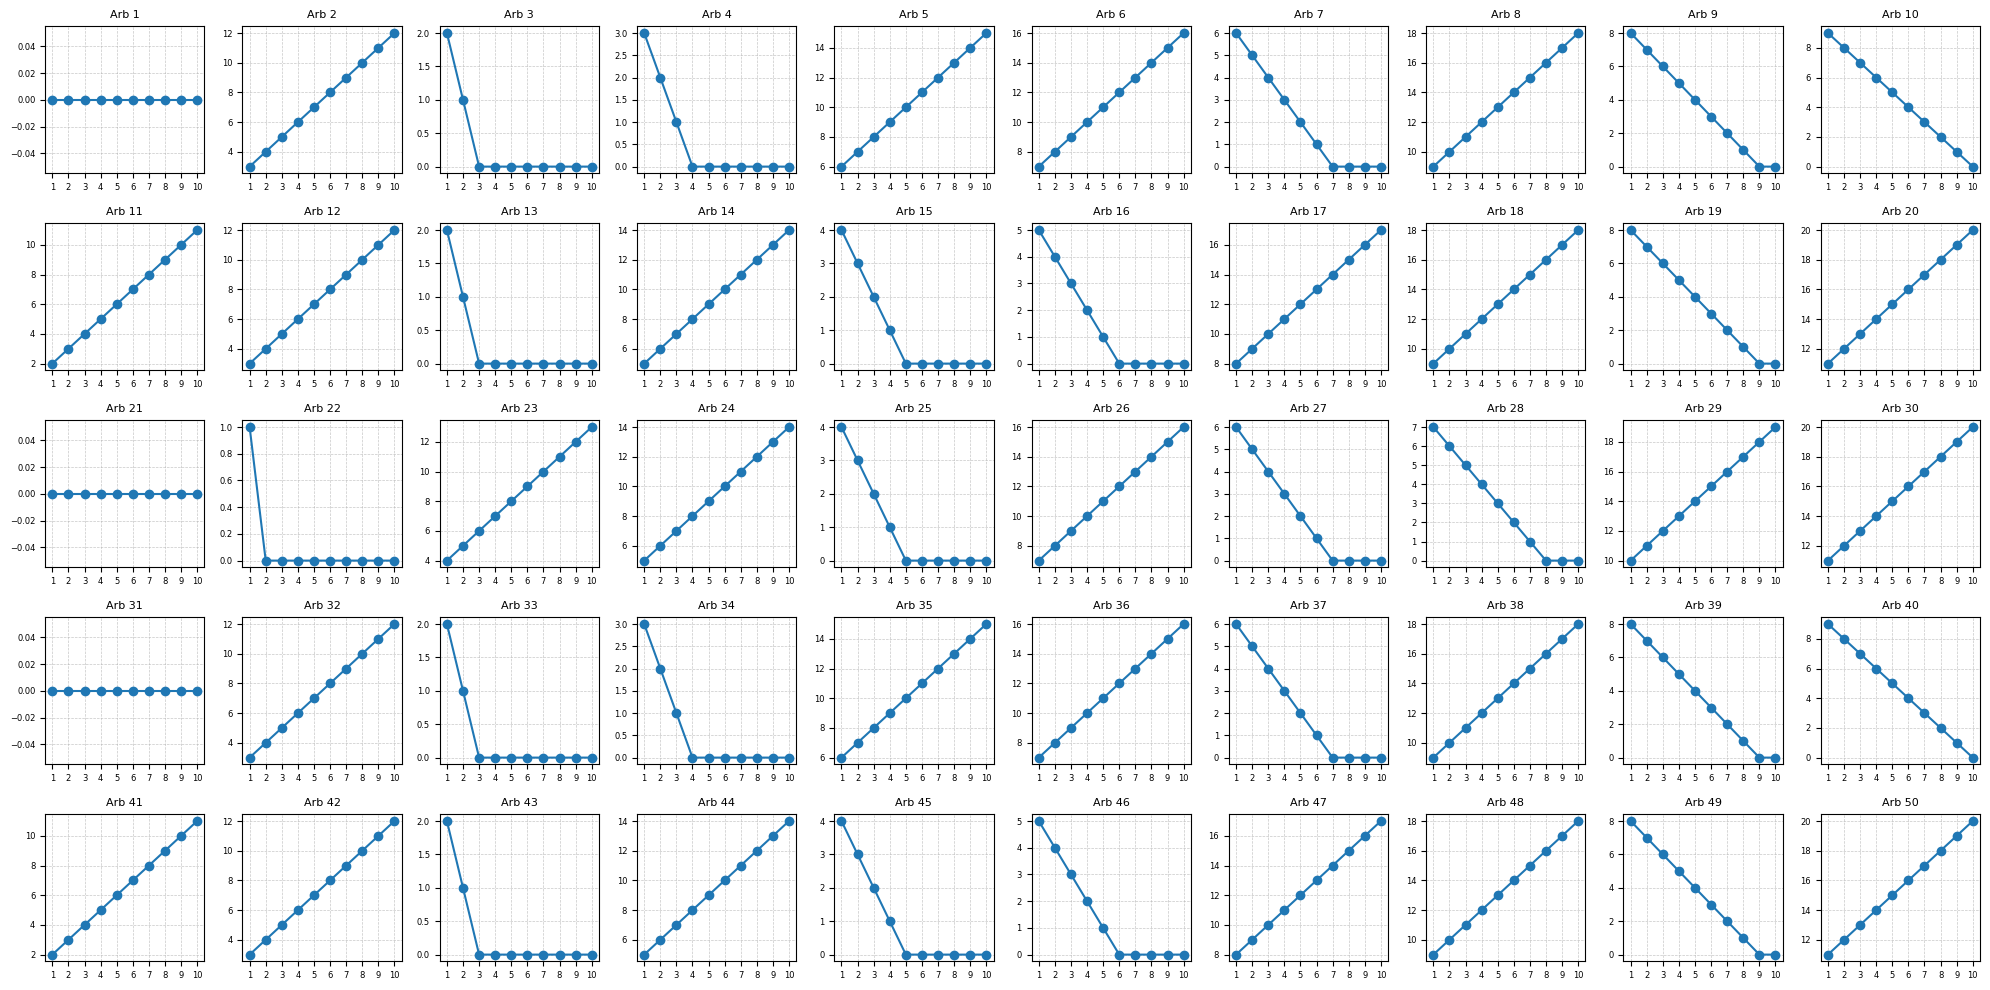

In [8]:
import matplotlib.pyplot as plt

# Assuming 'merged_df' is the DataFrame we've previously prepared

# Convert 'Contract' to integer if not already
merged_df['Contract'] = merged_df['Contract'].astype(int)

# Sort the DataFrame by 'Arbitrator_number' and 'Contract'
merged_df.sort_values(['Arbitrator_number', 'Contract'], inplace=True)

# Get the list of arbitrators
arbitrators = merged_df['Arbitrator_number'].unique()

# Determine the grid size (e.g., 5 rows x 10 columns for 50 arbitrators)
num_arbitrators = len(arbitrators)
cols = 10  # Number of columns in the grid
rows = num_arbitrators // cols + int(num_arbitrators % cols > 0)  # Calculate rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each arbitrator's governance tokens in the corresponding subplot
for idx, arbitrator in enumerate(arbitrators):
    arbitrator_data = merged_df[merged_df['Arbitrator_number'] == arbitrator]
    ax = axes[idx]
    
    ax.plot(arbitrator_data['Contract'], arbitrator_data['Arbitrator_tokens'], marker='o', linestyle='-')
    ax.set_title(f'Arb {arbitrator}', fontsize=8)
    ax.set_xticks(arbitrator_data['Contract'])
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Optionally remove x and y labels to reduce clutter
    # ax.set_xlabel('')  
    # ax.set_ylabel('')
    
    # Set limits if needed
    # ax.set_ylim([0, max_tokens])  # Adjust 'max_tokens' based on your data

# Remove any unused subplots (if num_arbitrators < rows * cols)
for i in range(num_arbitrators, rows * cols):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


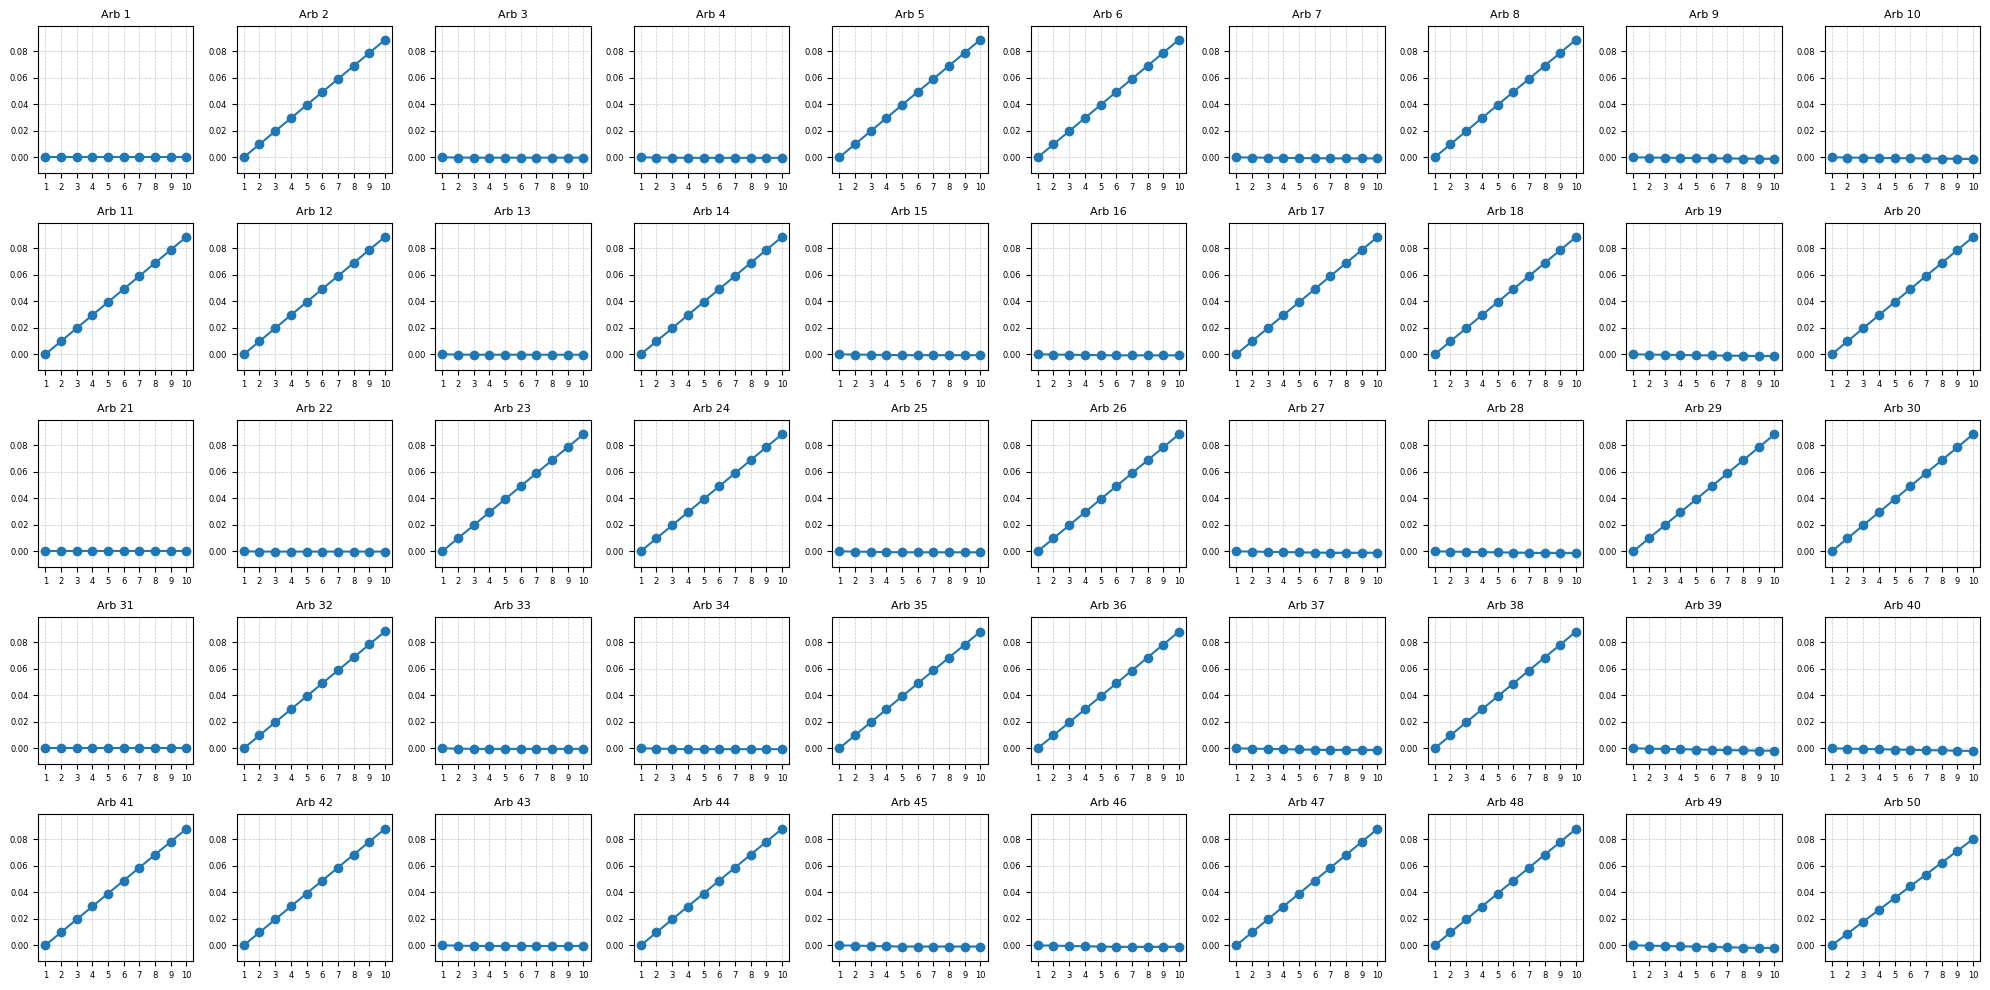

In [9]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal

# Read the log data from the 'test_output.log' file
with open('test_output.log', 'r') as file:
    lines = file.readlines()

# Initialize lists to store the data
contracts = []
arbitrator_entries = []

current_contract = None
client_balance = None
freelancer_balance = None
corp_balance = None

# Regular expressions to match the lines
contract_re = re.compile(r'^Contract (\d+):')
client_balance_re = re.compile(r'^Client balance: ([\d\.]+) ETH$')
freelancer_balance_re = re.compile(r'^Freelancer balance: ([\d\.]+) ETH$')
corp_balance_re = re.compile(r'^Corp balance: ([\d\.]+) ETH$')
arbitrator_re = re.compile(
    r'^Arbitrator (\d+) ETH balance: ([\d\.]+) ETH tokens: (\d+) Strategy: (\d+)$')

# Iterate over the lines
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace

    contract_match = contract_re.match(line)
    if contract_match:
        # When we encounter a new contract, save the previous contract's data if it exists
        if current_contract is not None:
            # Append the contract data to the list
            contracts.append({
                'Contract': current_contract,
                'Client_balance': client_balance,
                'Freelancer_balance': freelancer_balance,
                'Corp_balance': corp_balance,
            })
        # Reset variables for the new contract
        current_contract = int(contract_match.group(1))
        client_balance = None
        freelancer_balance = None
        corp_balance = None
        continue

    # Match client balance
    client_balance_match = client_balance_re.match(line)
    if client_balance_match:
        client_balance = Decimal(client_balance_match.group(1))
        continue

    # Match freelancer balance
    freelancer_balance_match = freelancer_balance_re.match(line)
    if freelancer_balance_match:
        freelancer_balance = Decimal(freelancer_balance_match.group(1))
        continue

    # Match corp balance
    corp_balance_match = corp_balance_re.match(line)
    if corp_balance_match:
        corp_balance = Decimal(corp_balance_match.group(1))
        continue

    # Match arbitrator entry
    arbitrator_match = arbitrator_re.match(line)
    if arbitrator_match:
        arbitrator_number = int(arbitrator_match.group(1))
        eth_balance = Decimal(arbitrator_match.group(2))
        tokens = int(arbitrator_match.group(3))
        strategy = int(arbitrator_match.group(4))
        arbitrator_entries.append({
            'Contract': current_contract,
            'Arbitrator_number': arbitrator_number,
            'Arbitrator_ETH_balance': eth_balance,
            'Arbitrator_tokens': tokens,
            'Arbitrator_strategy': strategy,
        })
        continue

# After the last contract, save its data
if current_contract is not None:
    contracts.append({
        'Contract': current_contract,
        'Client_balance': client_balance,
        'Freelancer_balance': freelancer_balance,
        'Corp_balance': corp_balance,
    })

# Create DataFrames
contracts_df = pd.DataFrame(contracts)
arbitrators_df = pd.DataFrame(arbitrator_entries)

# Merge the DataFrames on the 'Contract' column
merged_df = pd.merge(arbitrators_df, contracts_df, on='Contract', how='left')

# Convert 'Contract' to integer if not already
merged_df['Contract'] = merged_df['Contract'].astype(int)

# Sort the DataFrame by 'Arbitrator_number' and 'Contract'
merged_df.sort_values(['Arbitrator_number', 'Contract'], inplace=True)

# Calculate the initial ETH balance for each arbitrator
initial_balances = merged_df.groupby('Arbitrator_number')['Arbitrator_ETH_balance'].first().reset_index()
initial_balances.rename(columns={'Arbitrator_ETH_balance': 'Initial_ETH_balance'}, inplace=True)

# Merge the initial balances back into the merged_df
merged_df = pd.merge(merged_df, initial_balances, on='Arbitrator_number')

# Calculate the balance delta for each arbitrator
merged_df['Balance_delta'] = merged_df['Arbitrator_ETH_balance'] - merged_df['Initial_ETH_balance']

# Convert 'Balance_delta' to float for plotting
merged_df['Balance_delta'] = merged_df['Balance_delta'].astype(float)

# Get the list of arbitrators
arbitrators = merged_df['Arbitrator_number'].unique()

# Determine the grid size (e.g., 5 rows x 10 columns for 50 arbitrators)
num_arbitrators = len(arbitrators)
cols = 10  # Number of columns in the grid
rows = num_arbitrators // cols + int(num_arbitrators % cols > 0)  # Calculate rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each arbitrator's balance delta in the corresponding subplot
for idx, arbitrator in enumerate(arbitrators):
    arbitrator_data = merged_df[merged_df['Arbitrator_number'] == arbitrator]
    ax = axes[idx]
    
    ax.plot(arbitrator_data['Contract'], arbitrator_data['Balance_delta'], marker='o', linestyle='-')
    ax.set_title(f'Arb {arbitrator}', fontsize=8)
    ax.set_xticks(arbitrator_data['Contract'])
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Optionally remove x and y labels to reduce clutter
    # ax.set_xlabel('')  
    # ax.set_ylabel('')
    
    # Set y-axis limits for consistency
    # You can adjust these limits based on your data
    ax.set_ylim([merged_df['Balance_delta'].min() - 0.01, merged_df['Balance_delta'].max() + 0.01])

# Remove any unused subplots (if num_arbitrators < rows * cols)
for i in range(num_arbitrators, rows * cols):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
